In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as s
from statsmodels import graphics as graph
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
cfg = None
with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)["Lab_4"]

# HousePrice.xls

In [3]:
df = pd.read_csv(cfg["HousePrice"])
df = df.drop(columns=["waterfront", 'yr_renovated', 'yr_built', 'view', 'condition'])
df = df.select_dtypes(exclude=['O'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   sqft_above     4600 non-null   int64  
 7   sqft_basement  4600 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 287.6 KB


In [5]:
df.head(20)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0    313000.0       3.0       1.50         1340      7912     1.5        1340   
1   2384000.0       5.0       2.50         3650      9050     2.0        3370   
2    342000.0       3.0       2.00         1930     11947     1.0        1930   
3    420000.0       3.0       2.25         2000      8030     1.0        1000   
4    550000.0       4.0       2.50         1940     10500     1.0        1140   
5    490000.0       2.0       1.00          880      6380     1.0         880   
6    335000.0       2.0       2.00         1350      2560     1.0        1350   
7    482000.0       4.0       2.50         2710     35868     2.0        2710   
8    452500.0       3.0       2.50         2430     88426     1.0        1570   
9    640000.0       4.0       2.00         1520      6200     1.5        1520   
10   463000.0       3.0       1.75         1710      7320     1.0        1710   
11  1400000.0       4.0       2.50         2920      4000     1.5        1910   
12   588500.0       3.0       1.75         2330     14892     1.0        1970   
13   365000.0       3.0       1.00         1090      6435     1.0        1090   
14  1200000.0       5.0       2.75         2910      9480     1.5        2910   
15   242500.0       3.0       1.50         1200      9720     1.0        1200   
16   419000.0       3.0       1.50         1570      6700     1.0        1570   
17   367500.0       4.0       3.00         3110      7231     2.0        3110   
18   257950.0       3.0       1.75         1370      5858     1.0        1370   
19   275000.0       3.0       1.50         1180     10277     1.0        1180   

    sqft_basement  
0               0  
1             280  
2               0  
3            1000  
4             800  
5               0  
6               0  
7               0  
8             860  
9               0  
10              0  
11           1010  
12            360  
13              0  
14              0  
15              0  
16              0  
17              0  
18              0  
19              0

In [6]:
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   sqft_above  sqft_basement  
count  4600.000000  4600.000000    4600.000000  
mean      1.512065  1827.265435     312.081522  
std       0.538288   862.168977     464.137228  
min       1.000000   370.000000       0.000000  
25%       1.000000  1190.000000       0.000000  
50%       1.500000  1590.000000       0.000000  
75%       2.000000  2300.000000     610.000000  
max       3.500000  9410.000000    4820.000000

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   

               sqft_above  sqft_basement  
price            0.367570       0.210427  
bedrooms         0.484705       0.334165  
bathrooms        0.689918       0.298020  
sqft_living      0.876443       0.447206  
sqft_lot         0.216455       0.034842  
floors           0.522814      -0.255510  
sqft_above       1.000000      -0.038723  
sqft_basement   -0.038723       1.000000

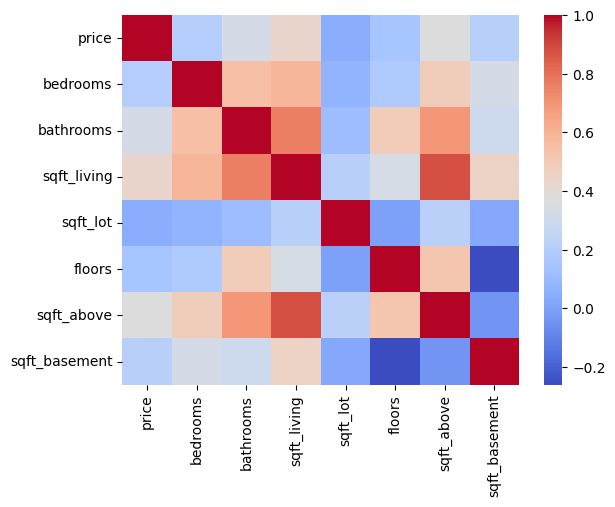

In [7]:
sns.heatmap(round(df.corr(), 2), cmap='coolwarm')
df.corr()

**Вывод:** 
Между некоторыми переменными есть сильные и слабые корреляции.

In [8]:
for i1 in range(len(df.columns)):
    var1 = df.columns[i1]
    for i2 in range(0, i1):
        var2 = df.columns[i2]
        stat, p = stats.pearsonr(df[var1], df[var2])
        if p > 0.05:
            print(f"({var1}, {var2}): P-value({p:.4f})")

(floors, sqft_lot): P-value(0.7993)


**Вывод:** Коэффициенты корреляции между вышеперечисленными величинами не значимы

In [9]:
df.columns = ['y'] + [f'x{i + 1}' for i in range(len(df.columns) - 1)] 
df = df[df['y'] > 0]
X = df.drop(columns=['y'], axis=1)
y = df["y"]

In [10]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

### Анализ базовой модели

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          5.97e-224
Time:                        10:18:45   Log-Likelihood:                -66198.
No. Observations:                4551   AIC:                         1.324e+05
Df Residuals:                    4544   BIC:                         1.325e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.185e+05    3.4e+04      3.488      0.000    5.19e+04    1.85e+05
x1          -6.06e+04   1.05e+04     -5.747      0.000   -8.13e+04   -3.99e+04
x2          2.104e+04   1.63e+04      1.288      0.198    -1.1e+04    5.31e+04
x3           199.9077      9.350     21.380      0.000     181.576     218.239
x4            -0.7580      0.215     -3.528      0.000      -1.179      -0.337
x5         -2412.2564   1.85e+04     -0.131      0.896   -3.86e+04    3.38e+04
x6            83.5620      9.722      8.595      0.000      64.502     102.622
x7           116.3457     13.060      8.909      0.000      90.742     141.949
==============================================================================
Omnibus:                    12647.726   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        565573654.159
Skew:                          35.079   Prob(JB):                         0.00
Kurtosis:                    1728.592   Cond. No.                     9.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.03e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
model.params

const    118542.108514
x1       -60600.272329
x2        21039.996268
x3          199.907692
x4           -0.757975
x5        -2412.256408
x6           83.561983
x7          116.345710
dtype: float64

In [13]:
# уравнение регресси
f = f"{round(model.params[0], 2)} + "
for idx in range(1, len(model.params) - 1):
    add_line = f"{round(model.params[idx]), 2}x_{idx} + "
    f += f"{round(model.params[idx], 2)}x_{idx} + "
    
f += f"{round(model.params[-1], 2)}x_{len(model.params)}"

print(f"y = {f}")

y = 118542.11 + -60600.27x_1 + 21040.0x_2 + 199.91x_3 + -0.76x_4 + -2412.26x_5 + 83.56x_6 + 116.35x_8


/tmp/ipykernel_101741/3818746264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = f"{round(model.params[0], 2)} + "
/tmp/ipykernel_101741/3818746264.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_line = f"{round(model.params[idx]), 2}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f += f"{round(model.params[idx], 2)}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:7: Fu

$$
y = 129179.45 + -58931.18x_1 + 9262.69x_2 + 196.12x_3 + -0.7x_4 + 9288.7x_5 + 78.34x_6 + 117.78x_8
$$


In [14]:
print(model.t_test(np.eye(len(model.params))))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1.185e+05    3.4e+04      3.488      0.000    5.19e+04    1.85e+05
c1          -6.06e+04   1.05e+04     -5.747      0.000   -8.13e+04   -3.99e+04
c2          2.104e+04   1.63e+04      1.288      0.198    -1.1e+04    5.31e+04
c3           199.9077      9.350     21.380      0.000     181.576     218.239
c4            -0.7580      0.215     -3.528      0.000      -1.179      -0.337
c5         -2412.2564   1.85e+04     -0.131      0.896   -3.86e+04    3.38e+04
c6            83.5620      9.722      8.595      0.000      64.502     102.622
c7           116.3457     13.060      8.909      0.000      90.742     141.949


коэффициенты $c_2, c_5$ не являются значимыми

In [15]:
print(f"F-statistics({model.fvalue:.4f}), P-value({model.f_pvalue:.4f})")

F-statistics(197.1255), P-value(0.0000)


Построенное уравнение значимо ($p < 0.05$)

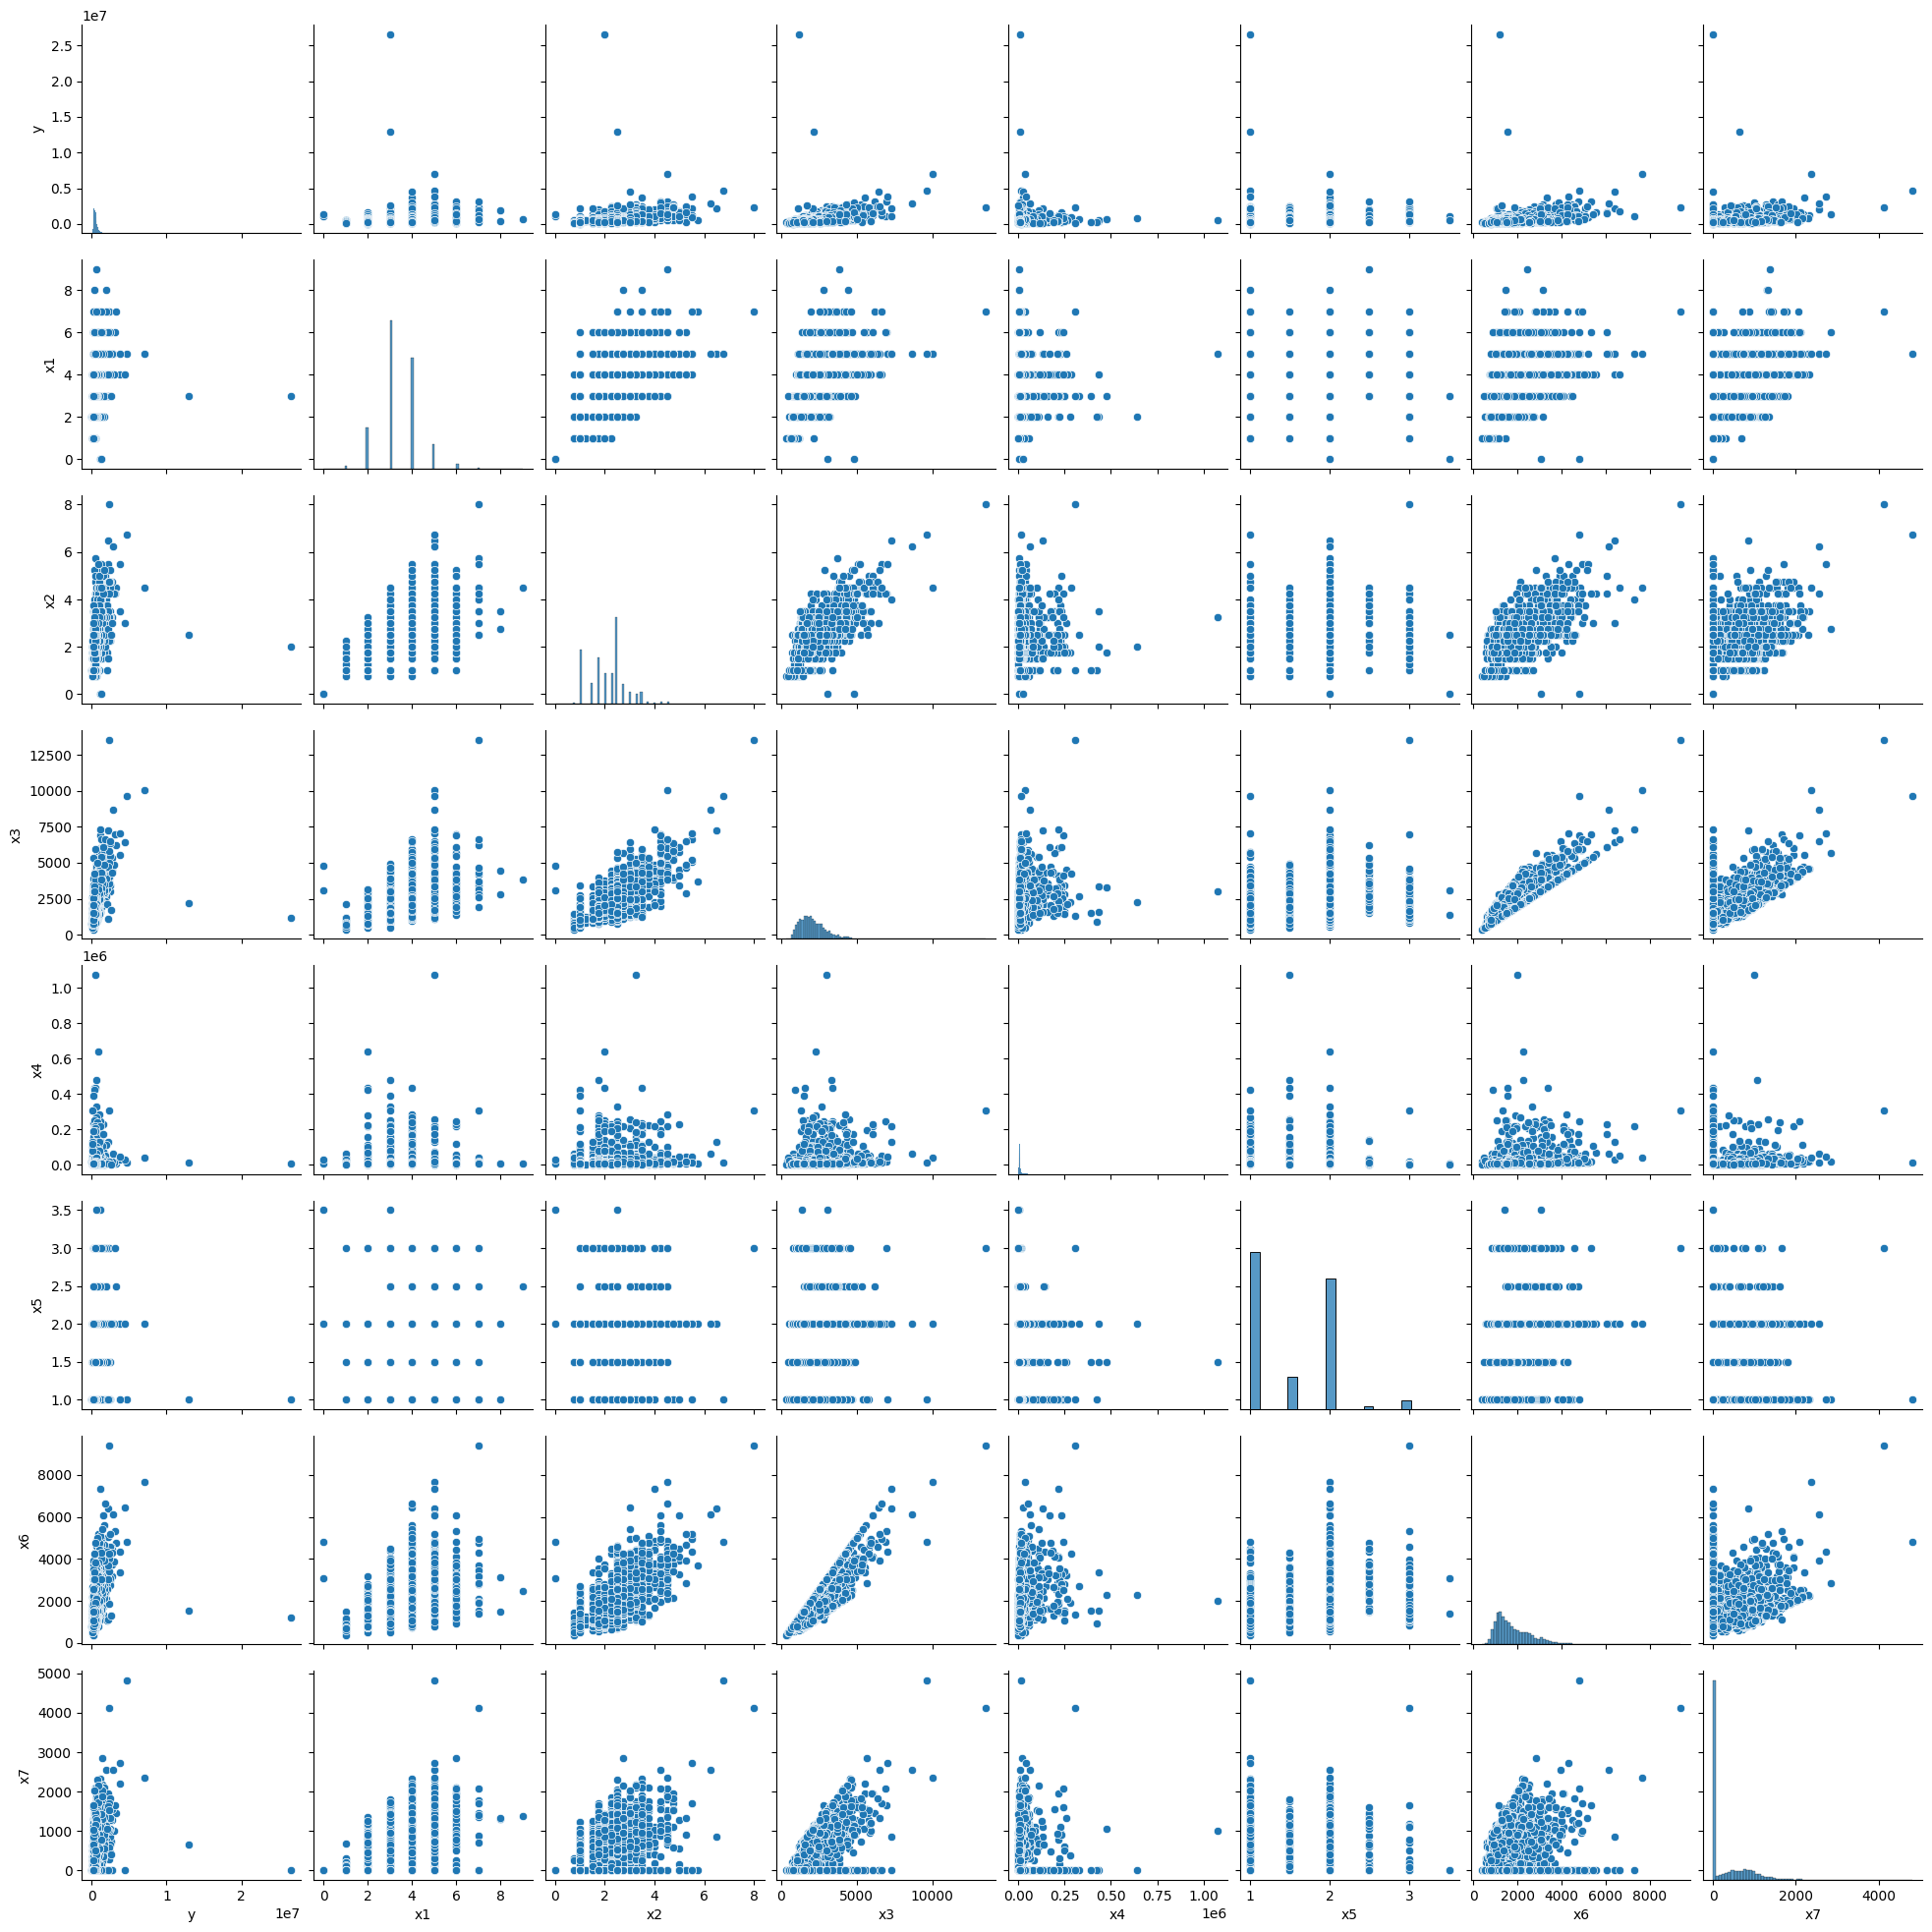

In [16]:
sns.pairplot(df)

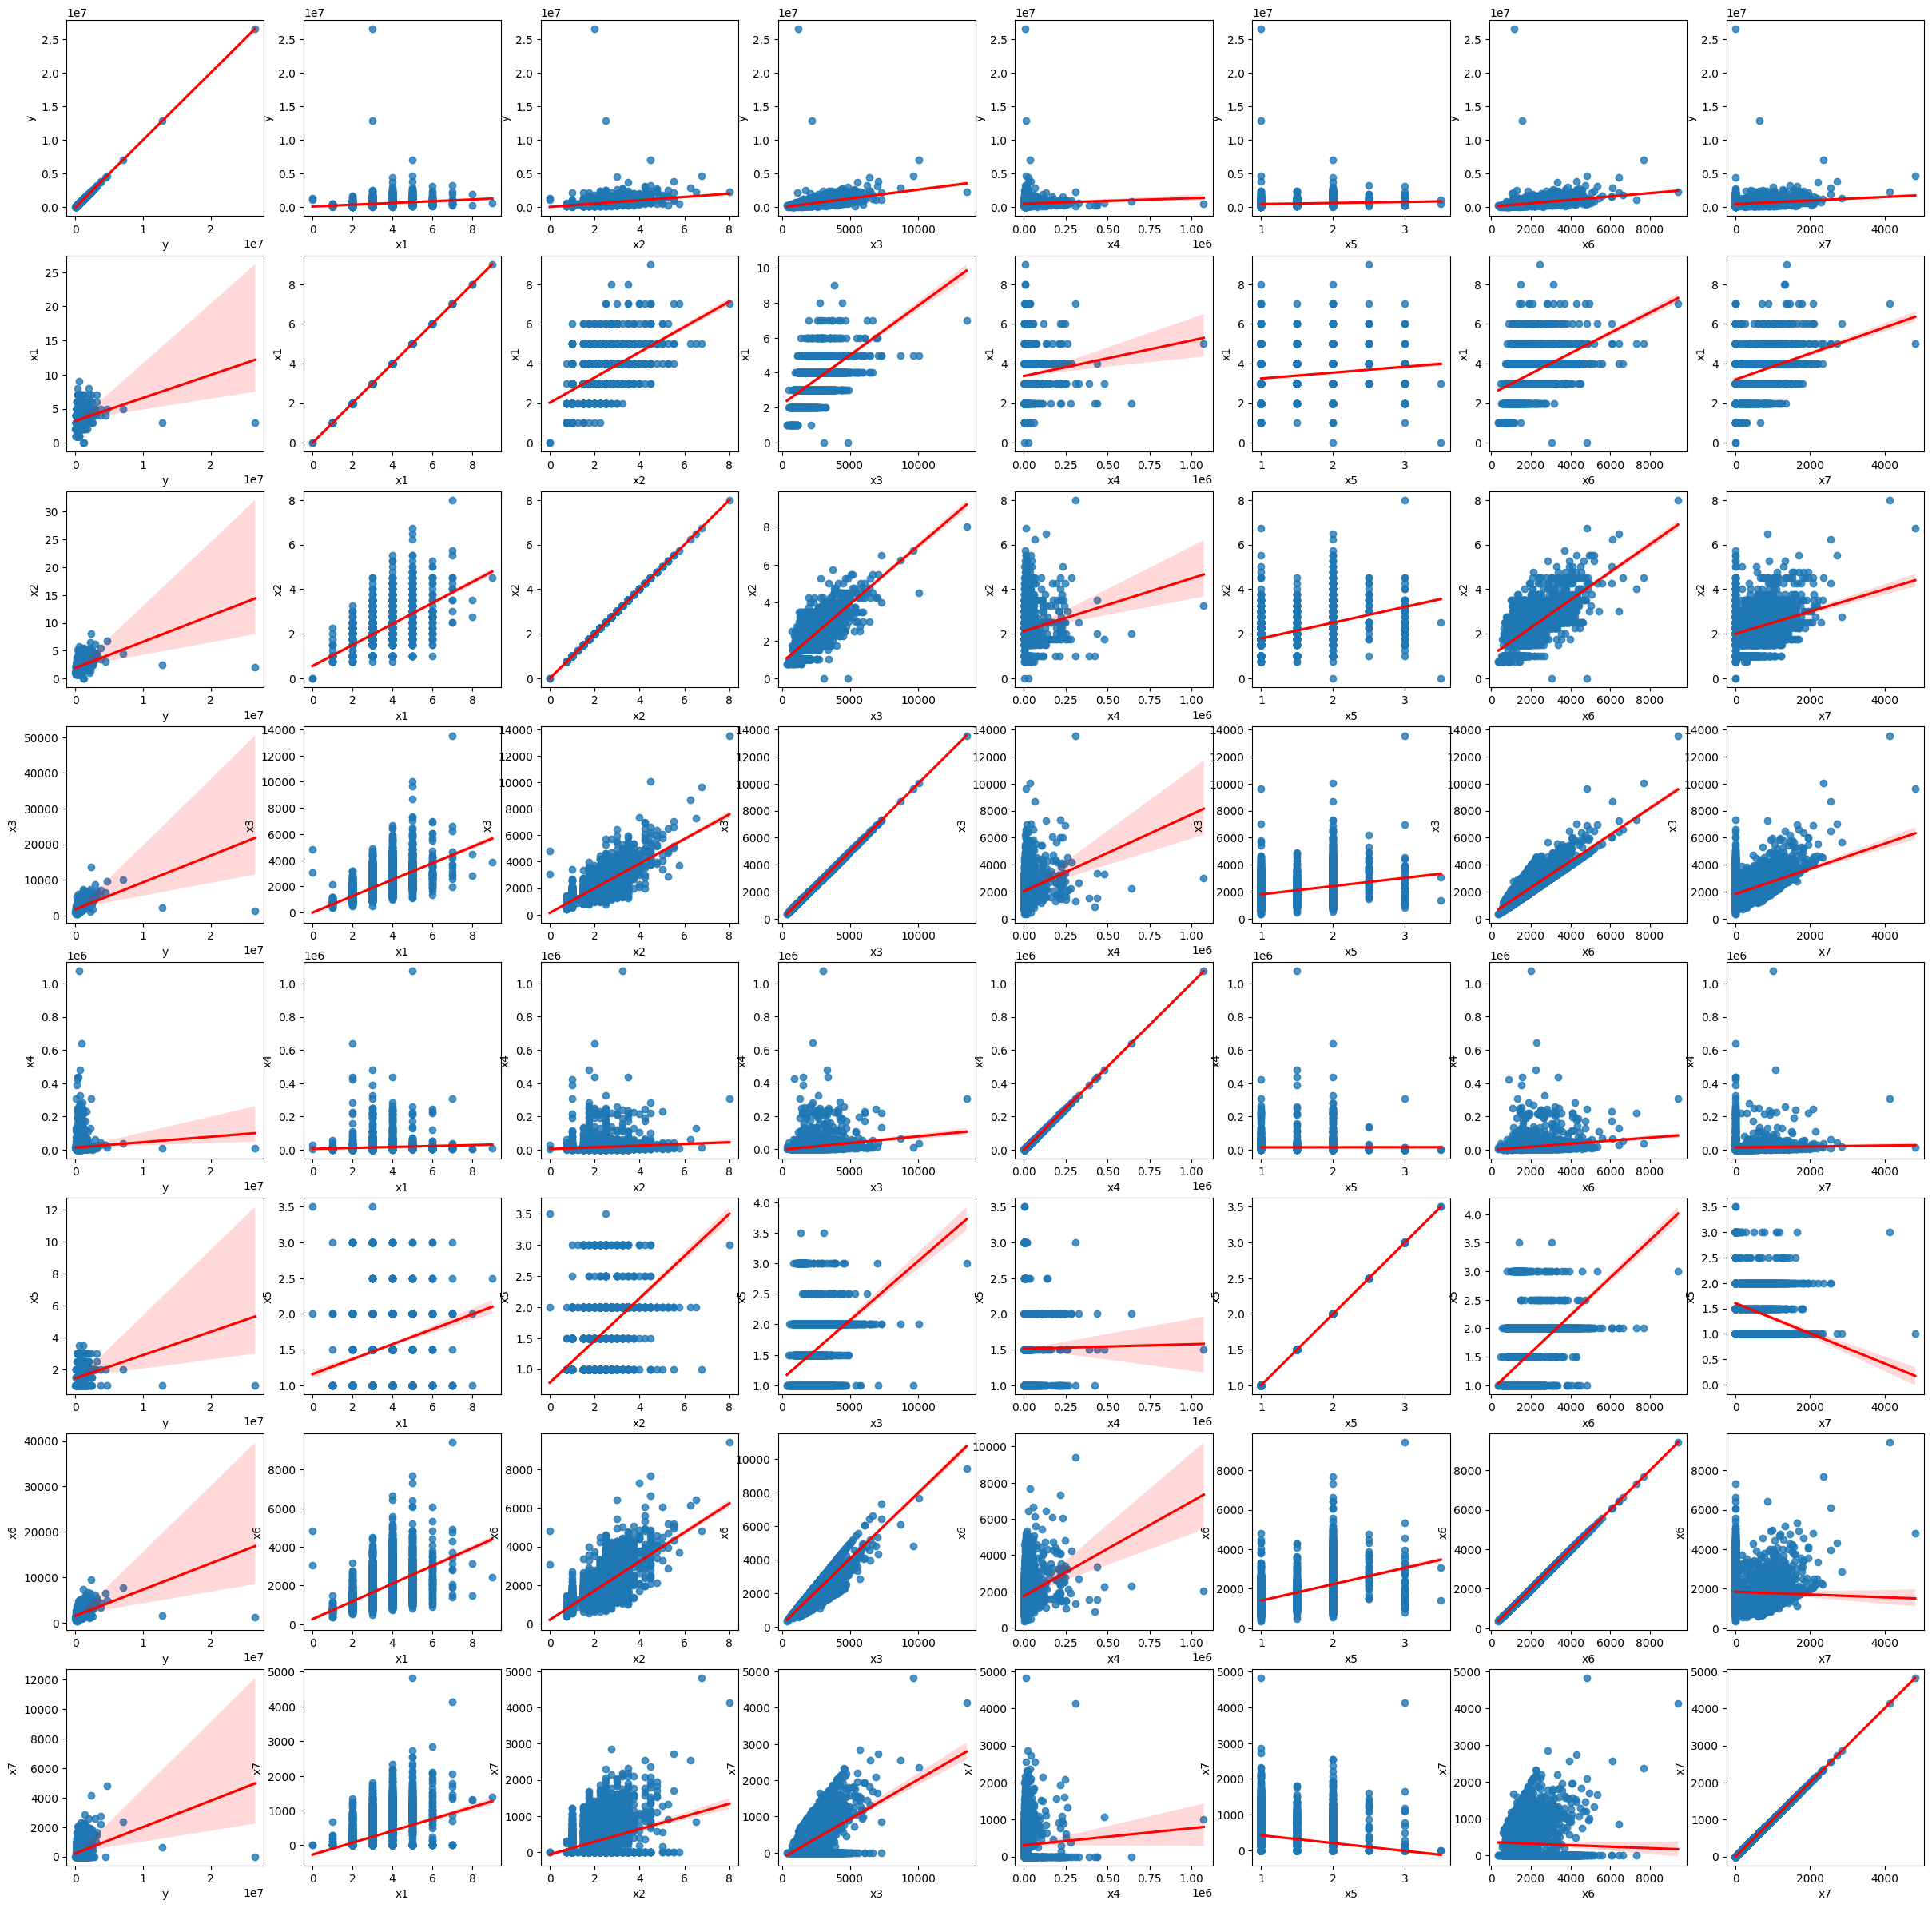

In [17]:
plt.figure(figsize=(30, 30))
for i1 in range(len(df.columns)):
    var1 = df.columns[i1]
    for i2 in range(len(df.columns)):
        var2 = df.columns[i2]

        plt.subplot(len(df.columns), len(df.columns), 1 + i1 + i2 * len(df.columns))
        sns.regplot(df, x=var1, y=var2, line_kws={'color': 'red'})

In [18]:
conf_intervals = model.conf_int()
conf_intervals.columns = ["[0.025", "0.975]"]
conf_intervals

[0.025         0.975]
const  51907.282277  185176.934751
x1    -81273.957210  -39926.587448
x2    -10987.128378   53067.120914
x3       181.576290     218.239093
x4        -1.179119      -0.336831
x5    -38592.376264   33767.863449
x6        64.501994     102.621971
x7        90.742353     141.949066

In [19]:
### Проверка на наличие выбросов
summary = model.get_influence().summary_frame()

# cooks_d - показывает влиятельность наблюдения на модель
summary = summary[summary["cooks_d"] > 4 / len(df)]

# standard_resid - стандартизированные остатки. Если > 3, значение считается важным
outliers = summary[summary['standard_resid'] > 3]

outliers

dfb_const    dfb_x1    dfb_x2    dfb_x3    dfb_x4    dfb_x5    dfb_x6  \
252   -0.156074  0.089016 -0.049622  0.120204 -0.042686  0.048634  0.017423   
404    0.047685 -0.048179 -0.018065  0.041564 -0.027785 -0.041977  0.095110   
1571  -0.001654 -0.033782 -0.013773  0.058212 -0.031350 -0.040443  0.135766   
1637  -0.025133 -0.112341 -0.094718  0.305653 -0.015888  0.103946 -0.077971   
1858  -0.069308  0.051202  0.007302  0.008381 -0.013104  0.021388 -0.009645   
2286   0.024952 -0.420482 -0.498672  1.193091 -0.225917 -0.053978  0.524087   
2654   0.008353 -0.257803  0.090793  0.452142 -0.089151 -0.071806 -0.127512   
2761   0.059624 -0.139279 -0.223830  0.347295 -0.113168 -0.109853  0.472592   
2772  -0.014265 -0.075928  0.057278  0.080818 -0.035133 -0.023743  0.032458   
3729  -0.003784 -0.124577  0.108697  0.207871 -0.019105 -0.117410 -0.016657   
4261  -0.046515  0.041565 -0.047514  0.043826 -0.026847 -0.023808  0.127138   
4346   0.400319 -0.348610  0.466363 -0.016970 -0.062430 -0.455993 -0.090901   
4347   0.004745  0.055042 -0.114139  0.082225 -0.003484  0.038143 -0.047178   
4348   0.002477  0.095498 -0.004550 -0.078146 -0.003108 -0.044341  0.008579   
4350   1.138216 -0.044232  1.538756 -1.768926 -0.072455 -1.605234  0.225828   
4465  -0.009179 -0.026141  0.046460 -0.026459 -0.003002  0.068840 -0.084151   

        dfb_x7   cooks_d  standard_resid  hat_diag  dffits_internal  \
252   0.073093  0.007187        3.223444  0.005503         0.239790   
404  -0.041044  0.001672        3.141349  0.001354         0.115651   
1571 -0.059390  0.003434        3.128645  0.002799         0.165750   
1637  0.276884  0.014907        4.273095  0.006489         0.345337   
1858  0.013181  0.001231        3.064995  0.001047         0.099241   
2286  0.464077  0.222031        8.580498  0.023557         1.332759   
2654  0.418647  0.052483        3.700236  0.029753         0.647967   
2761 -0.103158  0.042388        5.506793  0.011059         0.582330   
2772  0.033701  0.003773        3.269390  0.002816         0.173734   
3729  0.161231  0.017660        3.631388  0.010600         0.375874   
4261 -0.063268  0.003458        3.198458  0.002697         0.166320   
4346  0.055520  0.066890       24.438712  0.000895         0.731516   
4347  0.093992  0.002948        3.171832  0.002339         0.153579   
4348 -0.062337  0.002404        3.943925  0.001235         0.138691   
4350 -1.434623  0.335669       52.317190  0.000980         1.638703   
4465  0.043701  0.002102        4.138142  0.000981         0.129689   

      student_resid    dffits  
252        3.226781  0.240038  
404        3.144420  0.115764  
1571       3.131675  0.165910  
1637       4.281236  0.345995  
1858       3.067830  0.099333  
2286       8.649915  1.343541  
2654       3.705415  0.648874  
2761       5.524653  0.584218  
2772       3.272882  0.173920  
3729       3.636268  0.376379  
4261       3.201712  0.166490  
4346      26.219833  0.784830  
4347       3.174999  0.153732  
4348       3.950257  0.138913  
4350      82.955908  2.598383  
4465       4.145505  0.129919

In [20]:
df = df.drop(outliers.index) # удаляем выбросы
X = df.drop(columns=['y'], axis=1)
y = df['y']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     762.3
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:19:21   Log-Likelihood:                -62424.
No. Observations:                4535   AIC:                         1.249e+05
Df Residuals:                    4528   BIC:                         1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.768e+04   1.56e+04      5.621      0.000    5.71e+04    1.18e+05
x1         -4.677e+04   4861.907     -9.620      0.000   -5.63e+04   -3.72e+04
x2          1.043e+04   7519.104      1.387      0.166   -4314.968    2.52e+04
x3           182.8910      4.395     41.615      0.000     174.275     191.507
x4            -0.5909      0.099     -5.999      0.000      -0.784      -0.398
x5          2.902e+04   8471.083      3.426      0.001    1.24e+04    4.56e+04
x6            72.6103      4.492     16.163      0.000      63.803      81.418
x7           110.2808      6.059     18.201      0.000      98.402     122.159
==============================================================================
Omnibus:                     1433.293   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8042.963
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                       8.897   Cond. No.                     3.50e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.62e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Вывод:** модель удалось улучшить

In [21]:
def stepwise_selection_with_aic(X, y, initial_features):
    included = list(initial_features)
    best_aic = float('inf')

    while True:
        changed = False

        # Evaluating the current model
        X_with_const = sm.add_constant(X[included])
        model = sm.OLS(y, X_with_const).fit()
        current_aic = model.aic

        # Check for removal of features
        for feature in included:
            X_temp = X_with_const.drop(columns=feature)
            model_temp = sm.OLS(y, X_temp).fit()
            if model_temp.aic < current_aic:
                included.remove(feature)
                current_aic = model_temp.aic
                changed = True
                print(f"Removed {feature} with AIC {model_temp.aic:.4f}")
                break

        # Check for addition of features
        for feature in X.columns:
            if feature not in included:
                X_temp = X_with_const.copy()
                X_temp[feature] = X[feature]
                model_temp = sm.OLS(y, X_temp).fit()
                if model_temp.aic < current_aic:
                    included.append(feature)
                    changed = True
                    print(f"Added {feature} with AIC {model_temp.aic:.4f}")
                    break

        if not changed:
            break

    return included
# Initializing initial features (all features)
initial_features = X.columns.tolist()
selected_features = stepwise_selection_with_aic(X, y, initial_features)
X = sm.add_constant(X[selected_features])

Removed x2 with AIC 124862.2560


In [22]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     914.2
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:19:21   Log-Likelihood:                -62425.
No. Observations:                4535   AIC:                         1.249e+05
Df Residuals:                    4529   BIC:                         1.249e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.867e+04   1.56e+04      5.690      0.000    5.81e+04    1.19e+05
x1         -4.542e+04   4764.052     -9.534      0.000   -5.48e+04   -3.61e+04
x3           186.3922      3.597     51.812      0.000     179.339     193.445
x4            -0.5953      0.098     -6.046      0.000      -0.788      -0.402
x5          3.356e+04   7815.059      4.294      0.000    1.82e+04    4.89e+04
x6            73.6410      4.431     16.620      0.000      64.954      82.328
x7           112.7512      5.792     19.468      0.000     101.397     124.106
==============================================================================
Omnibus:                     1427.343   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8010.526
Skew:                           1.389   Prob(JB):                         0.00
Kurtosis:                       8.889   Cond. No.                     1.70e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.39e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
model.params

const    88667.761211
x1      -45420.467172
x3         186.392195
x4          -0.595314
x5       33559.358703
x6          73.640987
x7         112.751208
dtype: float64

In [24]:
# уравнение регресси
f = f"{round(model.params[0], 2)} + "
for idx in range(1, len(model.params) - 1):
    add_line = f"{round(model.params[idx]), 2}x_{idx} + "
    f += f"{round(model.params[idx], 2)}x_{idx} + "
    
f += f"{round(model.params[-1], 2)}x_{len(model.params)}"

print(f"y = {f}")

y = 88667.76 + -45420.47x_1 + 186.39x_2 + -0.6x_3 + 33559.36x_4 + 73.64x_5 + 112.75x_7


/tmp/ipykernel_101741/3818746264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = f"{round(model.params[0], 2)} + "
/tmp/ipykernel_101741/3818746264.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_line = f"{round(model.params[idx]), 2}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f += f"{round(model.params[idx], 2)}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:7: Fu

$$
y = 98510.65 + -45308.68x_1 + 178.65x_2 + -0.53x_3 + 39788.95x_4 + 67.61x_5 + 111.05x_7
$$


In [25]:
print(model.t_test(np.eye(len(model.params))))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          8.867e+04   1.56e+04      5.690      0.000    5.81e+04    1.19e+05
c1         -4.542e+04   4764.052     -9.534      0.000   -5.48e+04   -3.61e+04
c2           186.3922      3.597     51.812      0.000     179.339     193.445
c3            -0.5953      0.098     -6.046      0.000      -0.788      -0.402
c4          3.356e+04   7815.059      4.294      0.000    1.82e+04    4.89e+04
c5            73.6410      4.431     16.620      0.000      64.954      82.328
c6           112.7512      5.792     19.468      0.000     101.397     124.106


коэффициенты $c_2, c_5$ не являются значимыми

In [26]:
print(f"F-statistics({model.fvalue:.4f}), P-value({model.f_pvalue:.4f})")

F-statistics(914.1647), P-value(0.0000)


Построенное уравнение значимо ($p < 0.05$)

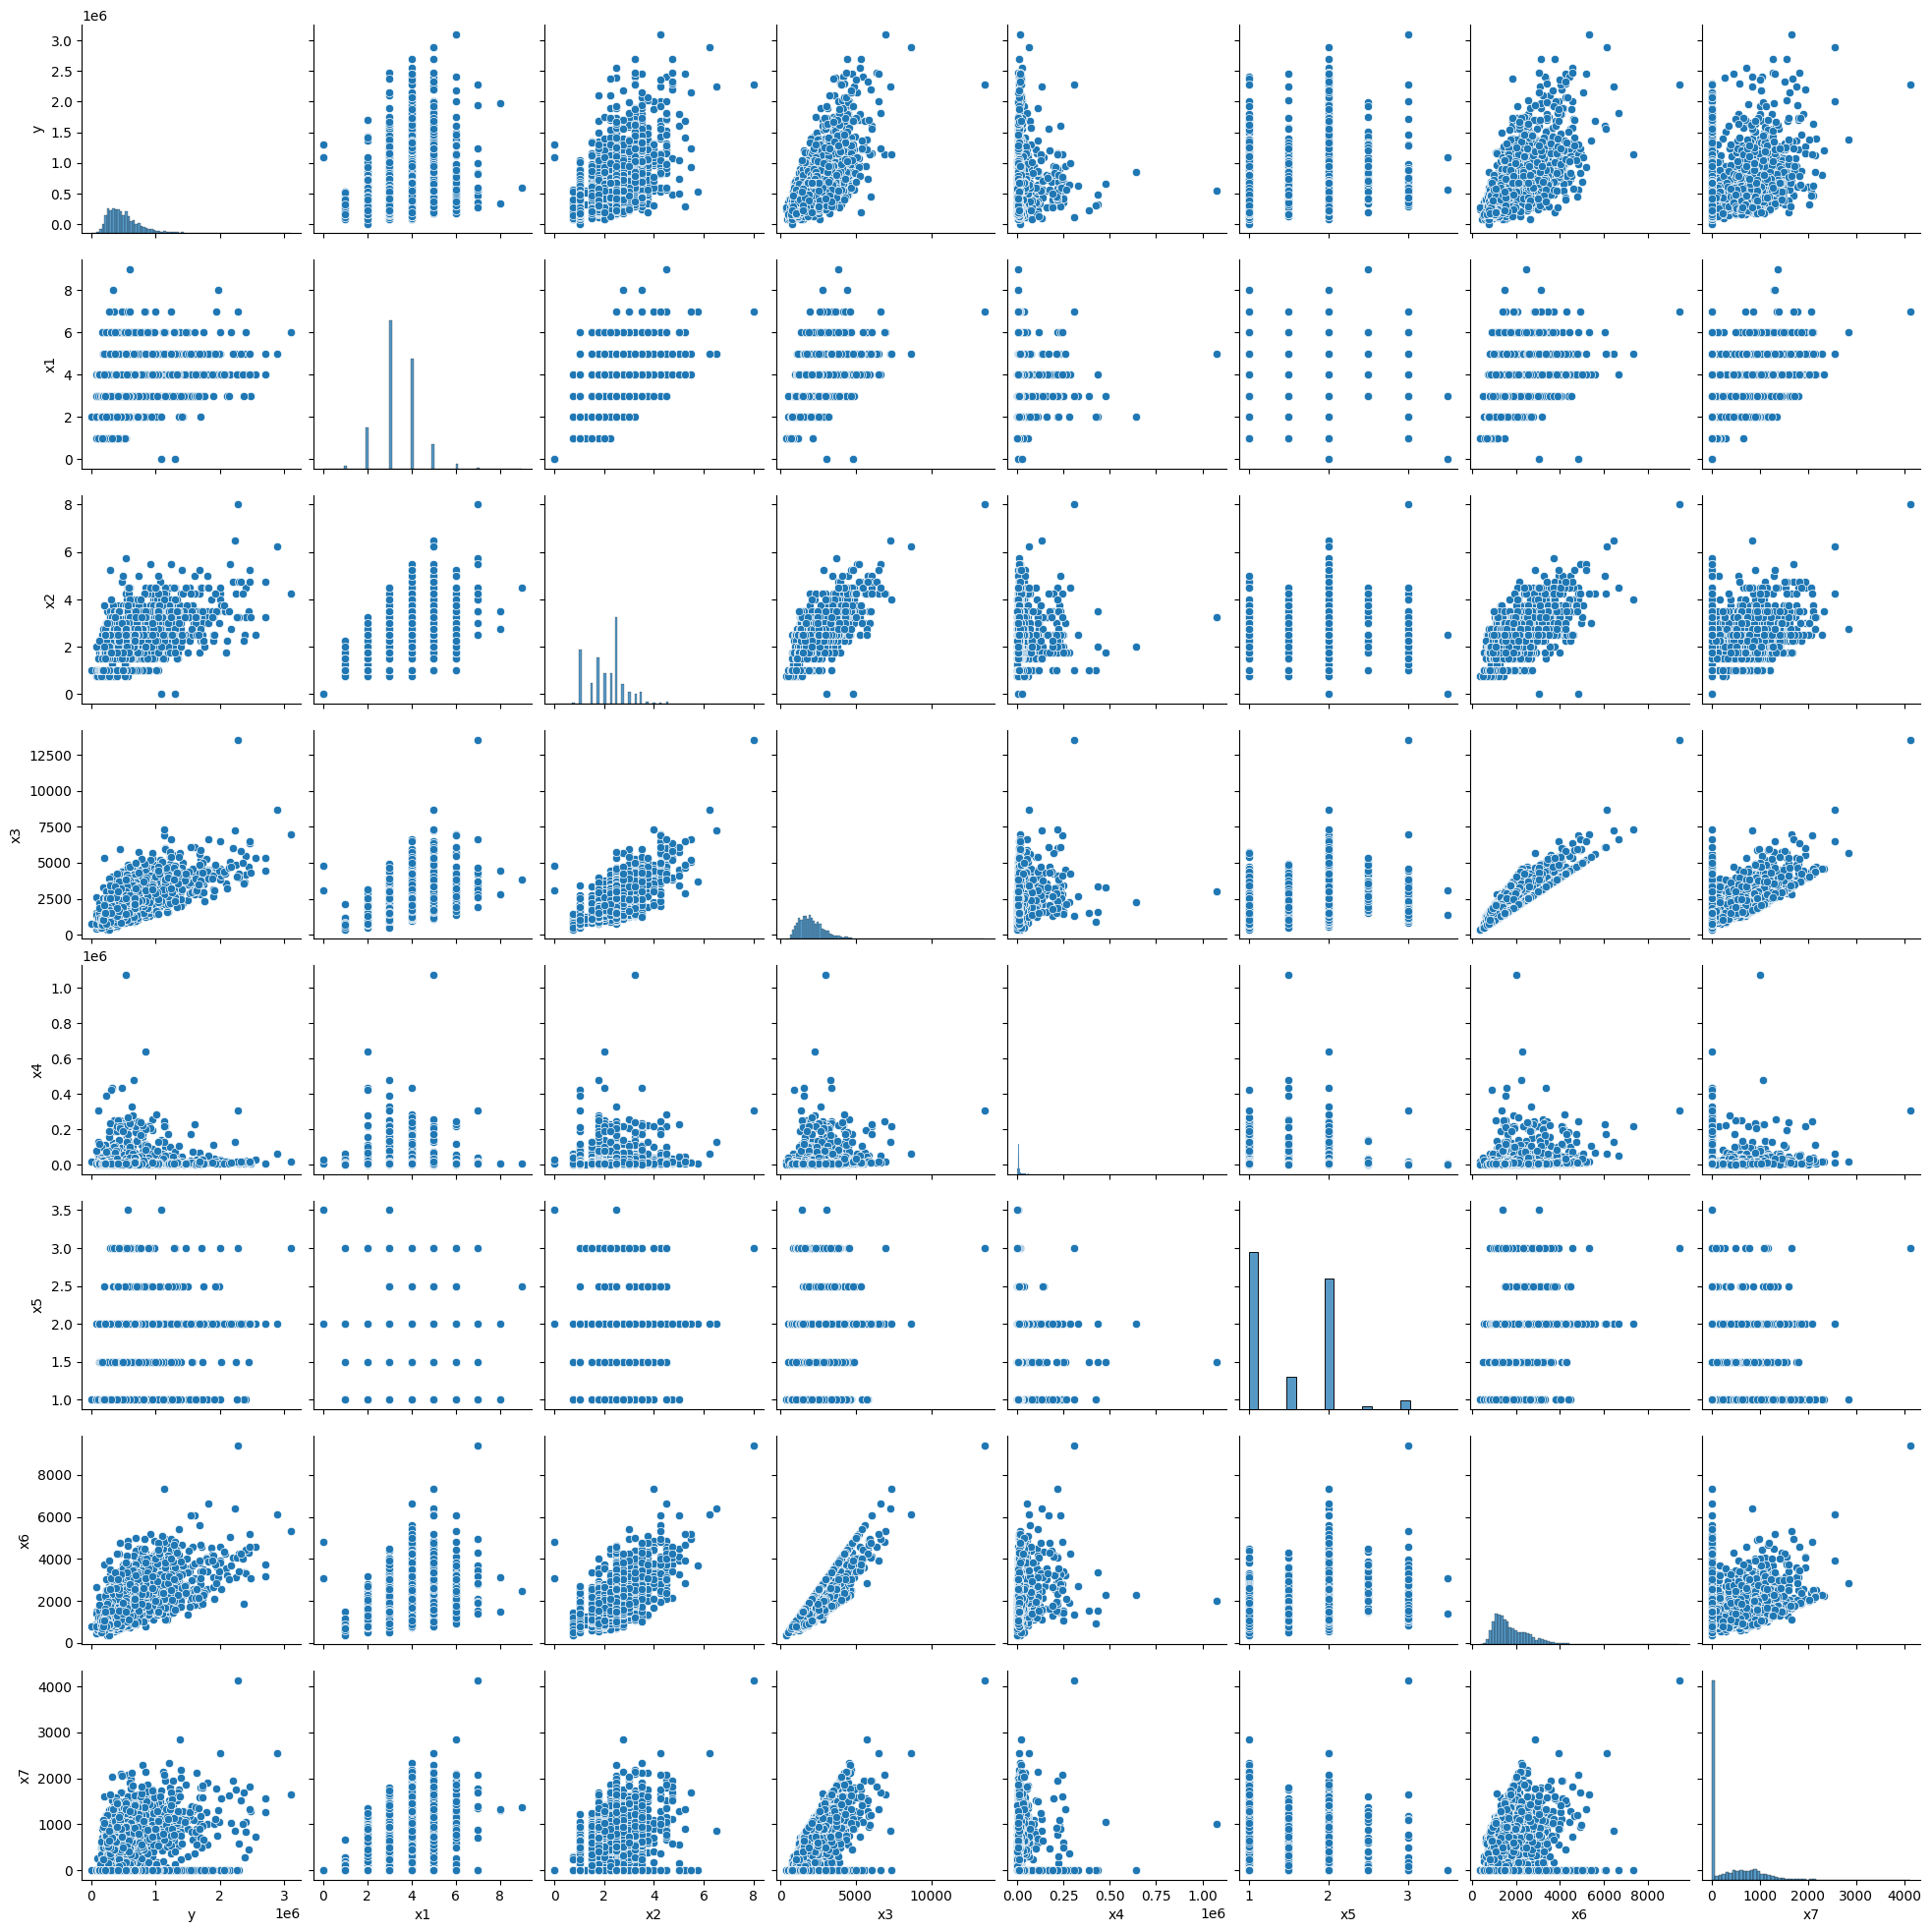

In [27]:
sns.pairplot(df)

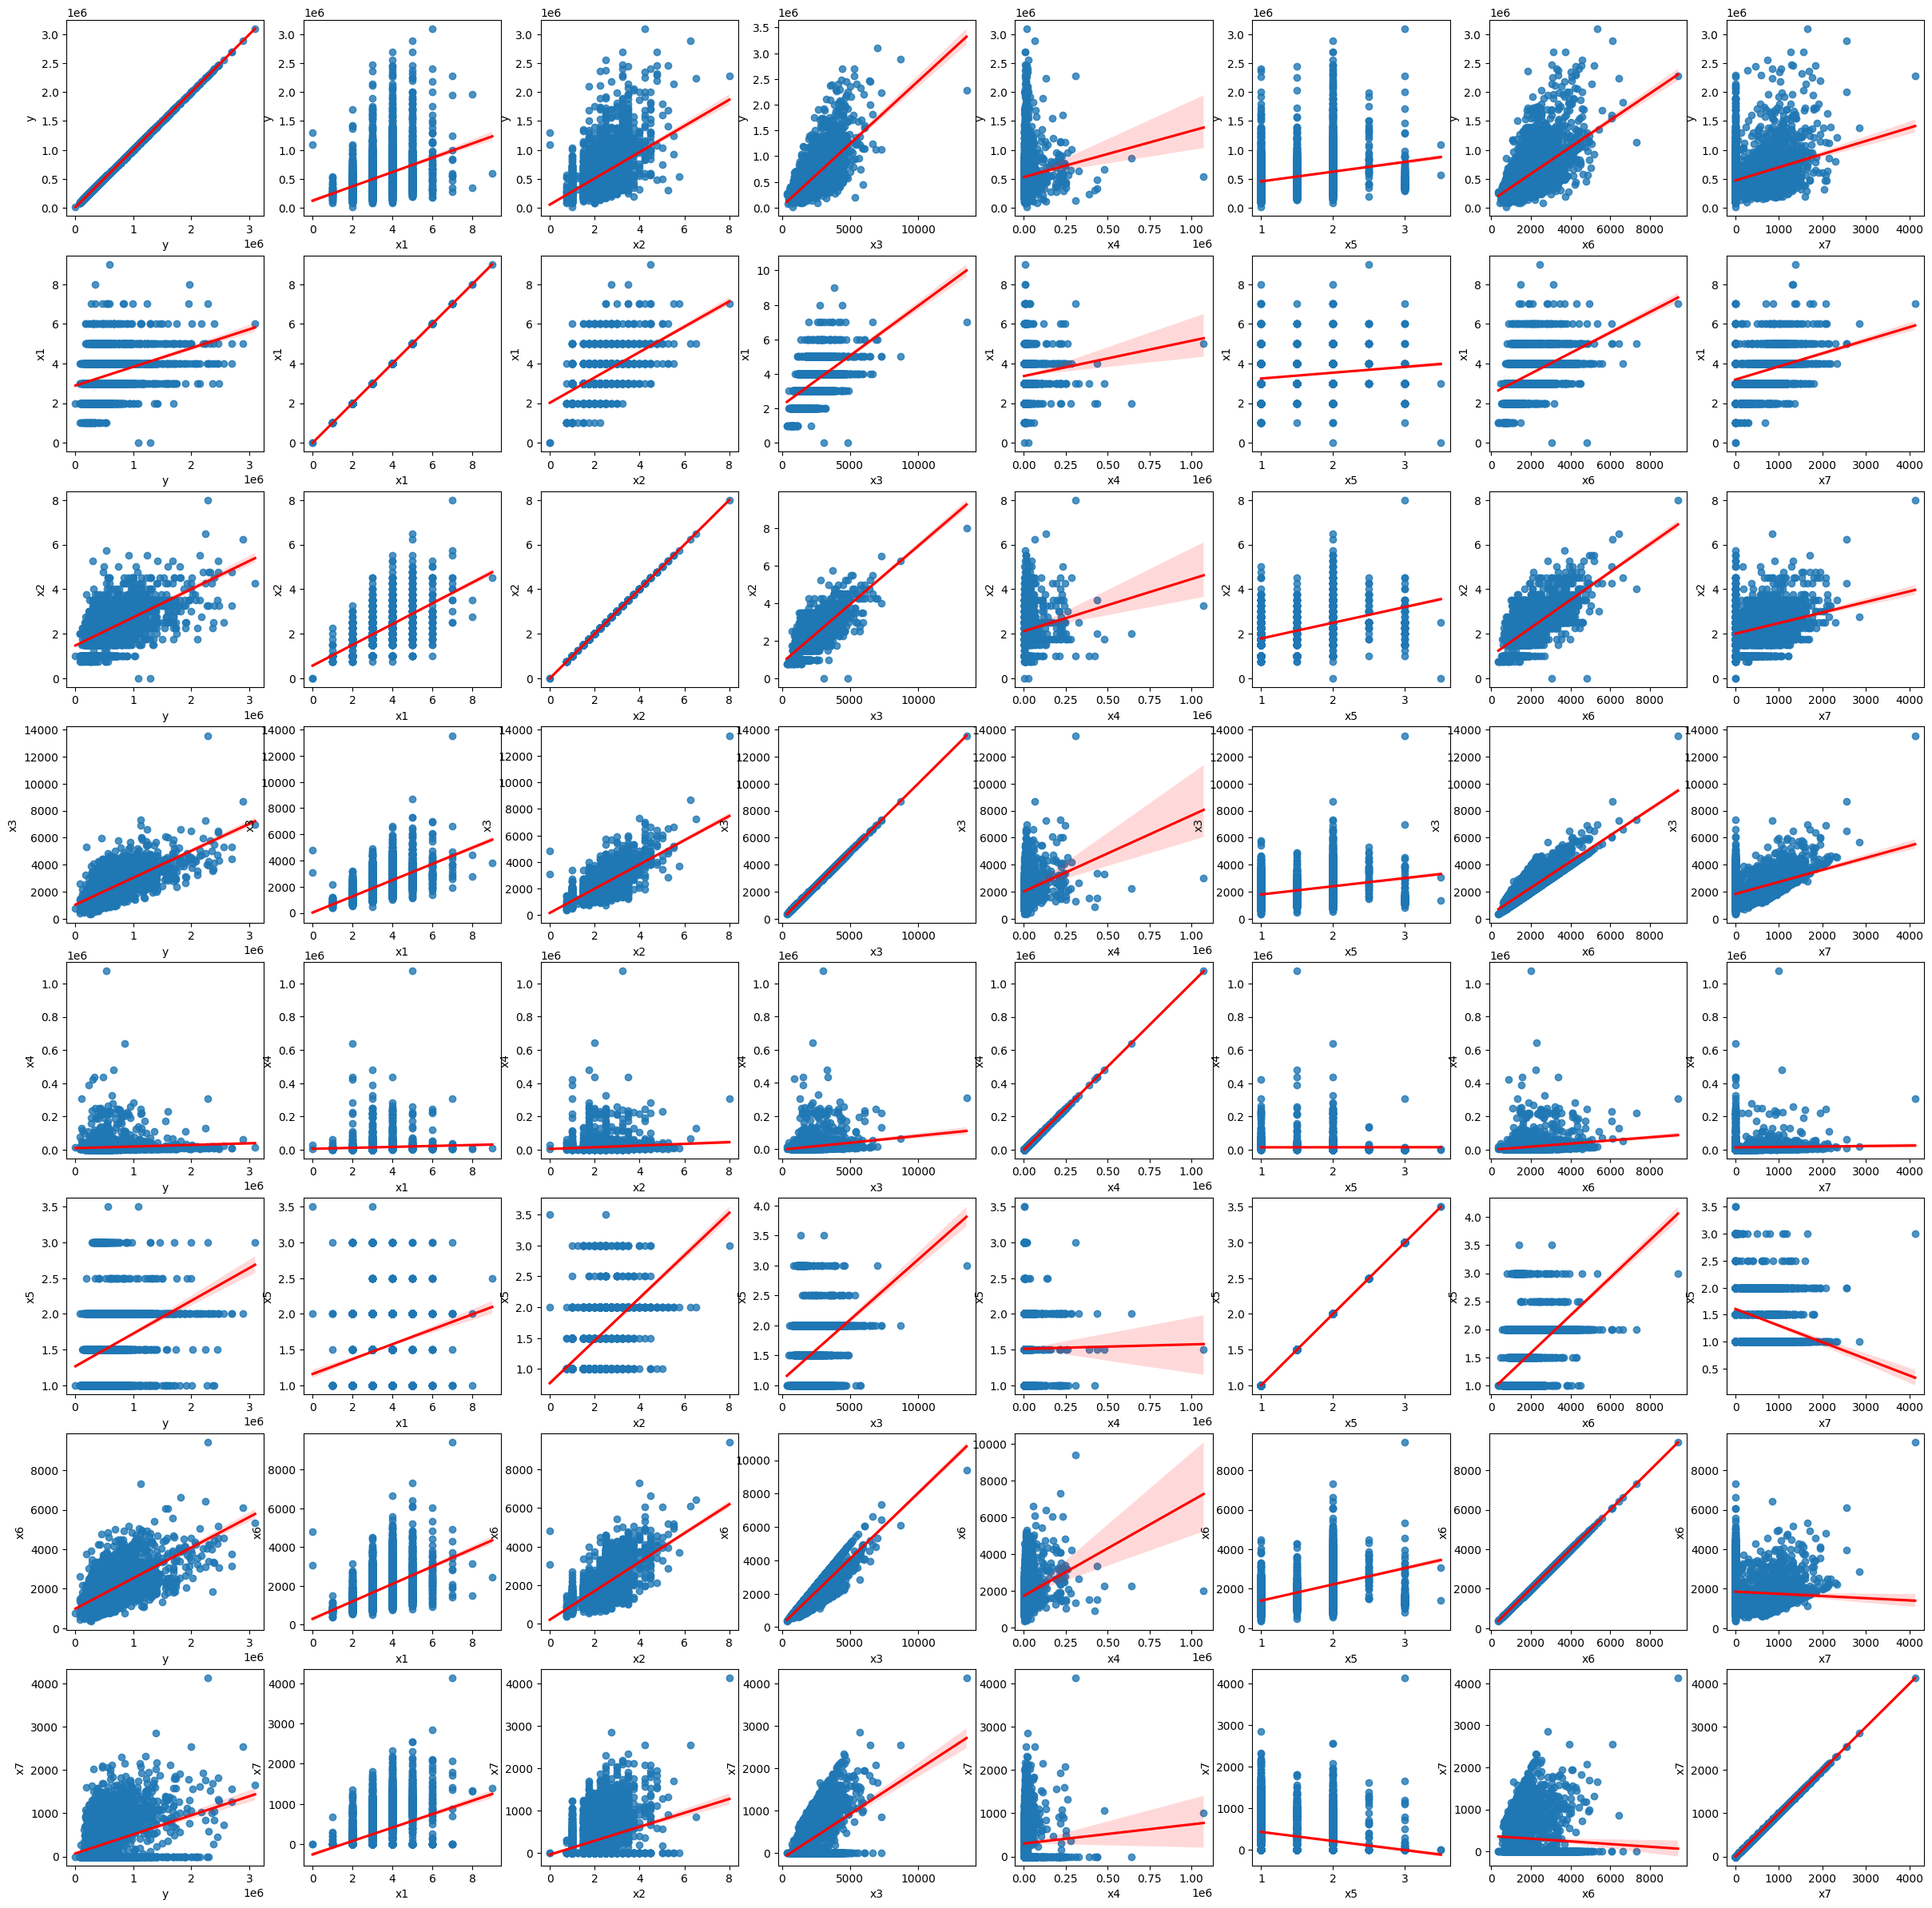

In [28]:
plt.figure(figsize=(30, 30))
for i1 in range(len(df.columns)):
    var1 = df.columns[i1]
    for i2 in range(len(df.columns)):
        var2 = df.columns[i2]

        plt.subplot(len(df.columns), len(df.columns), 1 + i1 + i2 * len(df.columns))
        sns.regplot(df, x=var1, y=var2, line_kws={'color': 'red'})

In [29]:
conf_intervals = model.conf_int()
conf_intervals.columns = ["[0.025", "0.975]"]
conf_intervals

[0.025         0.975]
const  58117.761207  119217.761214
x1    -54760.333698  -36080.600647
x3       179.339353     193.445038
x4        -0.788354      -0.402275
x5     18238.029106   48880.688300
x6        64.954082      82.327892
x7       101.396621     124.105795

In [30]:
### Проверка на наличие выбросов
summary = model.get_influence().summary_frame()

# cooks_d - показывает влиятельность наблюдения на модель
summary = summary[summary["cooks_d"] > 4 / len(df)]

# standard_resid - стандартизированные остатки. Если > 3, значение считается важным
outliers = summary[summary['standard_resid'] > 3]

outliers

dfb_const    dfb_x1    dfb_x3    dfb_x4    dfb_x5    dfb_x6    dfb_x7  \
1     -0.127755  0.102806  0.020491 -0.050995 -0.013140  0.106642 -0.068859   
133    0.057027 -0.099455  0.042327 -0.022476  0.028734  0.032162  0.001685   
217   -0.047627  0.023475  0.037047 -0.040265 -0.059336  0.145207 -0.088080   
356   -0.168027  0.159761 -0.066207 -0.024955  0.043996  0.051008 -0.080148   
359    0.054879 -0.053374  0.086603 -0.006741 -0.018181 -0.050596  0.092502   
...         ...       ...       ...       ...       ...       ...       ...   
4017   0.014349 -0.070542  0.080019 -0.023650  0.033711  0.004061  0.046597   
4135   0.008717 -0.135759  0.245794 -0.064264 -0.044600  0.104060  0.073062   
4142   0.005818 -0.084131  0.128170 -0.014866  0.065833 -0.067807  0.131488   
4143  -0.145355  0.098122  0.089076 -0.039146  0.004909  0.019412  0.040478   
4273  -0.058064 -0.047422  0.203313 -0.043298 -0.003074  0.026715  0.105849   

       cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
1     0.007888        6.521691  0.001296         0.234978       6.551808   
133   0.002192        3.412319  0.001316         0.123860       3.416337   
217   0.004896        3.382286  0.002987         0.185129       3.386192   
356   0.006982        4.091423  0.002911         0.221068       4.098553   
359   0.002242        3.681287  0.001157         0.125277       3.686400   
...        ...             ...       ...              ...            ...   
4017  0.001743        3.432415  0.001034         0.110448       3.436509   
4135  0.011100        3.273401  0.007199         0.278746       3.276918   
4142  0.003572        3.046548  0.002686         0.158118       3.049338   
4143  0.007391        4.516665  0.002530         0.227463       4.526372   
4273  0.007964        3.655841  0.004154         0.236117       3.660843   

        dffits  
1     0.236064  
133   0.124006  
217   0.185343  
356   0.221453  
359   0.125451  
...        ...  
4017  0.110580  
4135  0.279045  
4142  0.158263  
4143  0.227952  
4273  0.236440  

[73 rows x 13 columns]

In [31]:
df = df.drop(outliers.index) # удаляем выбросы
X = df.drop(columns=['y'], axis=1)
y = df['y']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     744.9
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:19:53   Log-Likelihood:                -60614.
No. Observations:                4462   AIC:                         1.212e+05
Df Residuals:                    4455   BIC:                         1.213e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.22e+05   1.32e+04      9.270      0.000    9.62e+04    1.48e+05
x1         -3.852e+04   4129.190     -9.329      0.000   -4.66e+04   -3.04e+04
x2          1.224e+04   6375.338      1.919      0.055    -261.717    2.47e+04
x3           154.5624      3.776     40.931      0.000     147.159     161.966
x4            -0.3592      0.083     -4.354      0.000      -0.521      -0.197
x5          3.137e+04   7159.095      4.382      0.000    1.73e+04    4.54e+04
x6            58.7187      3.817     15.382      0.000      51.235      66.203
x7            95.8436      5.173     18.528      0.000      85.702     105.985
==============================================================================
Omnibus:                      509.894   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1072.809
Skew:                           0.710   Prob(JB):                    1.10e-233
Kurtosis:                       4.938   Cond. No.                     2.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Вывод:** Не стоит убирать важные признаки в улучшенной модели

## Графики

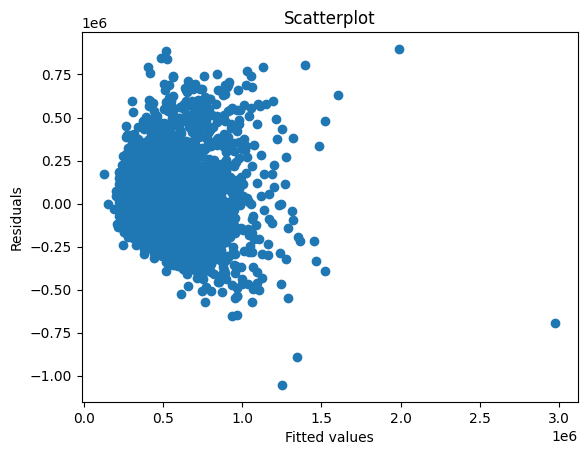

In [32]:
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Scatterplot")
plt.scatter(model.fittedvalues, model.resid)

Text(0, 0.5, 'Residuals')

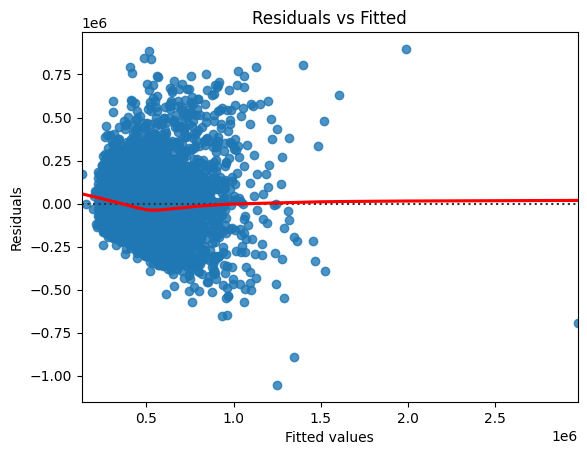

In [33]:
sns.residplot(
    x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"}
)
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Остатки должны быть случайным образом разбросаны относительно прямой y=0. В нашем случае это не наблюдается в начале, но четко прослеживается в конце

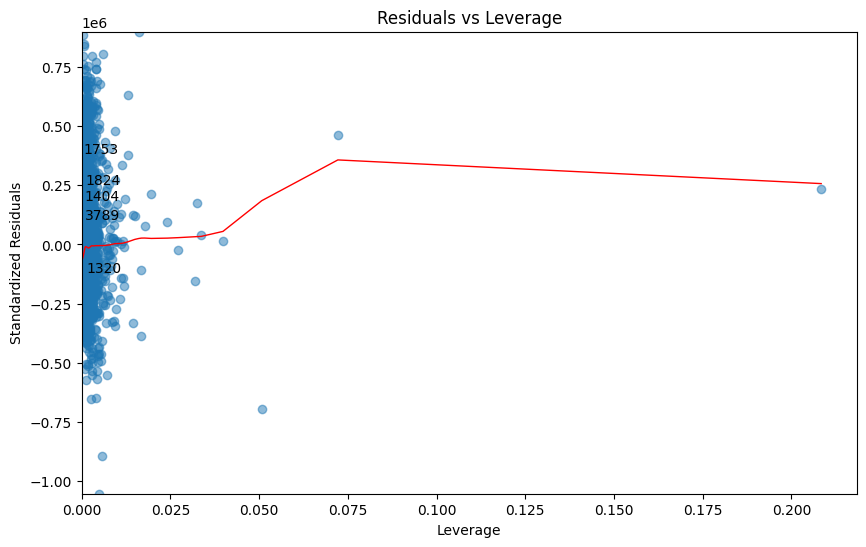

In [34]:
residuals = model.resid
leverage = model.get_influence().hat_matrix_diag

plt.figure(figsize=(10, 6))

plt.scatter(leverage, residuals, alpha=0.5)
sns.regplot(x=leverage, y=residuals, scatter=False, ci=None, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1.0})

plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')

# Установка диапазонов осей
plt.xlim(0, max(leverage) + 0.01)
plt.ylim(min(residuals) - 3, max(residuals) + 3)

# Добавление аннотаций для точек с наибольшим влиянием
leverage_top_3 = np.flip(np.argsort(model.get_influence().cooks_distance[0])[:5])
for i in leverage_top_3:
    plt.annotate(i, xy=(leverage[i], residuals[i]))

plt.show()

Text(0.5, 1.0, 'Normal Q-Q')

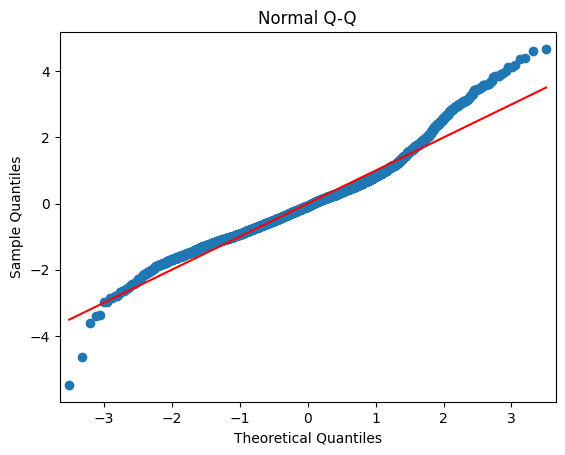

In [35]:
graph.gofplots.qqplot(model.resid_pearson, line='s')
plt.title('Normal Q-Q')

В целом, сложно сказать, является ли распределение нормальным

## Наличие выбросов

### Гетероскедастичность

In [36]:
bp_test = s.diagnostic.het_breuschpagan(model.resid, X)
print(f"LM-statistics({bp_test[0]:.4f}), P-value({bp_test[1]:.4f})")

LM-statistics(596.5119), P-value(0.0000)


Наблюдаем проблему гетероскедастичности (все остатки $\epsilon_i$ имеют различные дисперсии)

### Автокорреляция

In [37]:
bg_test = s.diagnostic.acorr_breusch_godfrey(model, nlags=1)
print(f"LM-statistics({bg_test[0]:.4f}), P-value({bg_test[1]:.4f})")

LM-statistics(1.8104), P-value(0.1785)


Автокорреляции нет (это нулевая гипотеза)

### Нормальность распределения

In [38]:
jb_test = stats.jarque_bera(model.resid)
print(f"JB-statistics({jb_test[0]:.4f}), P-value({jb_test[1]:.4f})")

JB-statistics(1072.8091), P-value(0.0000)


In [58]:
stats.shapiro(model.resid)

ShapiroResult(statistic=np.float64(0.9962787355700737), pvalue=np.float64(3.887138861729771e-09))

Распределение остатков не является нормальным

### Мультиколлинеарность данных

In [39]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [s.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('VIF:')
print(vif_data)

VIF:
  feature        VIF
0   const  20.941433
1      x1   1.645326
2      x2   2.808286
3      x3        inf
4      x4   1.081848
5      x5   1.790053
6      x6        inf
7      x7        inf


/home/victor/Study/University/Statistics/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Мультиколлинеарность означает линейную зависимость одной независимой переменной от линейной комбинации других независимых переменных  
Есть мультиколлинеарность (не все VIF коэффициенты меньше 10)

In [40]:
X = df.drop(columns=['y'], axis=1)
y = df["y"]

Y_boxcox, lmbda = stats.boxcox(y)
print(lmbda)
model = sm.OLS(Y_boxcox, X).fit()
df['y'] = Y_boxcox

0.06691457334341984


In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          1.728e+04
Date:                Mon, 18 Nov 2024   Prob (F-statistic):                        0.00
Time:                        10:19:55   Log-Likelihood:                         -12771.
No. Observations:                4462   AIC:                                  2.555e+04
Df Residuals:                    4456   BIC:                                  2.559e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7043      0.070     53.157      0.000       3.568       3.841
x2             0.4838      0.140      3.445      0.001       0.208       0.759
x3          7.794e-05   8.29e-05      0.940      0.347   -8.45e-05       0.000
x4          8.311e-06   1.81e-06      4.584      0.000    4.76e-06    1.19e-05
x5             4.7675      0.142     33.636      0.000       4.490       5.045
x6            -0.0008   8.29e-05     -9.055      0.000      -0.001      -0.001
x7             0.0008      0.000      7.277      0.000       0.001       0.001
==============================================================================
Omnibus:                       57.502   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.114
Skew:                          -0.187   Prob(JB):                     8.06e-17
Kurtosis:                       3.509   Cond. No.                     9.32e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.9e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# уравнение регресси
f = f"{round(model.params[0], 2)} + "
for idx in range(1, len(model.params) - 1):
    add_line = f"{round(model.params[idx]), 2}x_{idx} + "
    f += f"{round(model.params[idx], 2)}x_{idx} + "
    
f += f"{round(model.params[-1], 2)}x_{len(model.params)}"

print(f"y = {f}")

y = 3.7 + 0.48x_1 + 0.0x_2 + 0.0x_3 + 4.77x_4 + -0.0x_5 + 0.0x_7


/tmp/ipykernel_101741/3818746264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = f"{round(model.params[0], 2)} + "
/tmp/ipykernel_101741/3818746264.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_line = f"{round(model.params[idx]), 2}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f += f"{round(model.params[idx], 2)}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:7: Fu

$$
y = 3.7 + 0.48x_1^{1.09} + 0.0x_2 + 0.0x_3 + 4.77x_4^{1.09} + -0.0x_5 + 0.0x_7
$$

Степенное преобразование

In [43]:
df.head()

y   x1    x2    x3     x4   x5    x6    x7
0  19.906255  3.0  1.50  1340   7912  1.5  1340     0
2  20.113503  3.0  2.00  1930  11947  1.0  1930     0
3  20.598780  3.0  2.25  2000   8030  1.0  1000  1000
4  21.245958  4.0  2.50  1940  10500  1.0  1140   800
5  20.967303  2.0  1.00   880   6380  1.0   880     0

### Анализ новой модели

<Axes: >

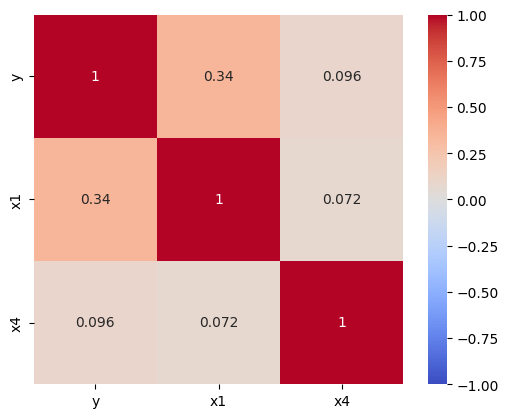

In [44]:
df = df[["y", "x1", "x4"]]

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, square=True, cmap="coolwarm")

In [45]:
X = df.drop(columns=['y'], axis=1)
Y = df['y']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     316.0
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          4.42e-129
Time:                        10:19:55   Log-Likelihood:                -6827.0
No. Observations:                4462   AIC:                         1.366e+04
Df Residuals:                    4459   BIC:                         1.368e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2563      0.065    294.043      0.000      19.128      19.385
x1             0.4540      0.019     24.182      0.000       0.417       0.491
x4          2.366e-06   4.63e-07      5.114      0.000    1.46e-06    3.27e-06
==============================================================================
Omnibus:                       34.166   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.488
Skew:                          -0.088   Prob(JB):                     4.88e-11
Kurtosis:                       3.474   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# уравнение регресси
f = f"{round(model.params[0], 2)} + "
for idx in range(1, len(model.params) - 1):
    add_line = f"{round(model.params[idx]), 2}x_{idx} + "
    f += f"{round(model.params[idx], 2)}x_{idx} + "
    
f += f"{round(model.params[-1], 2)}x_{len(model.params)}"

print(f"y = {f}")

y = 19.26 + 0.45x_1 + 0.0x_3


/tmp/ipykernel_101741/3818746264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = f"{round(model.params[0], 2)} + "
/tmp/ipykernel_101741/3818746264.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_line = f"{round(model.params[idx]), 2}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f += f"{round(model.params[idx], 2)}x_{idx} + "
/tmp/ipykernel_101741/3818746264.py:7: Fu

$$
y = 163411.78 + 102180.12x_1 + 0.64x_3
$$

In [48]:
print(model.t_test(np.eye(len(model.params))))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            19.2563      0.065    294.043      0.000      19.128      19.385
c1             0.4540      0.019     24.182      0.000       0.417       0.491
c2          2.366e-06   4.63e-07      5.114      0.000    1.46e-06    3.27e-06


In [49]:
print(f'F-statistics({model.fvalue:.4f}), P-value({model.f_pvalue:.4f})')

F-statistics(316.0316), P-value(0.0000)


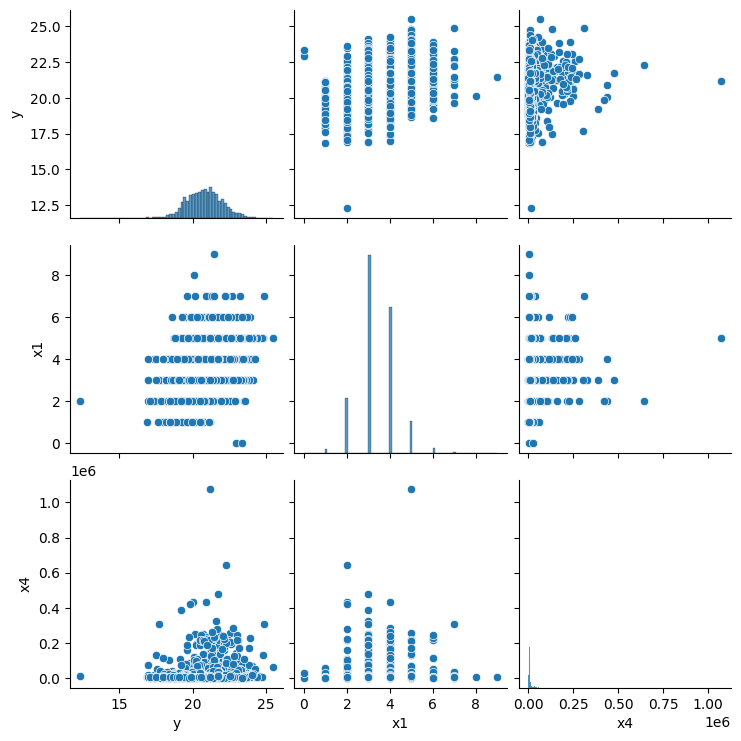

In [50]:
sns.pairplot(df)

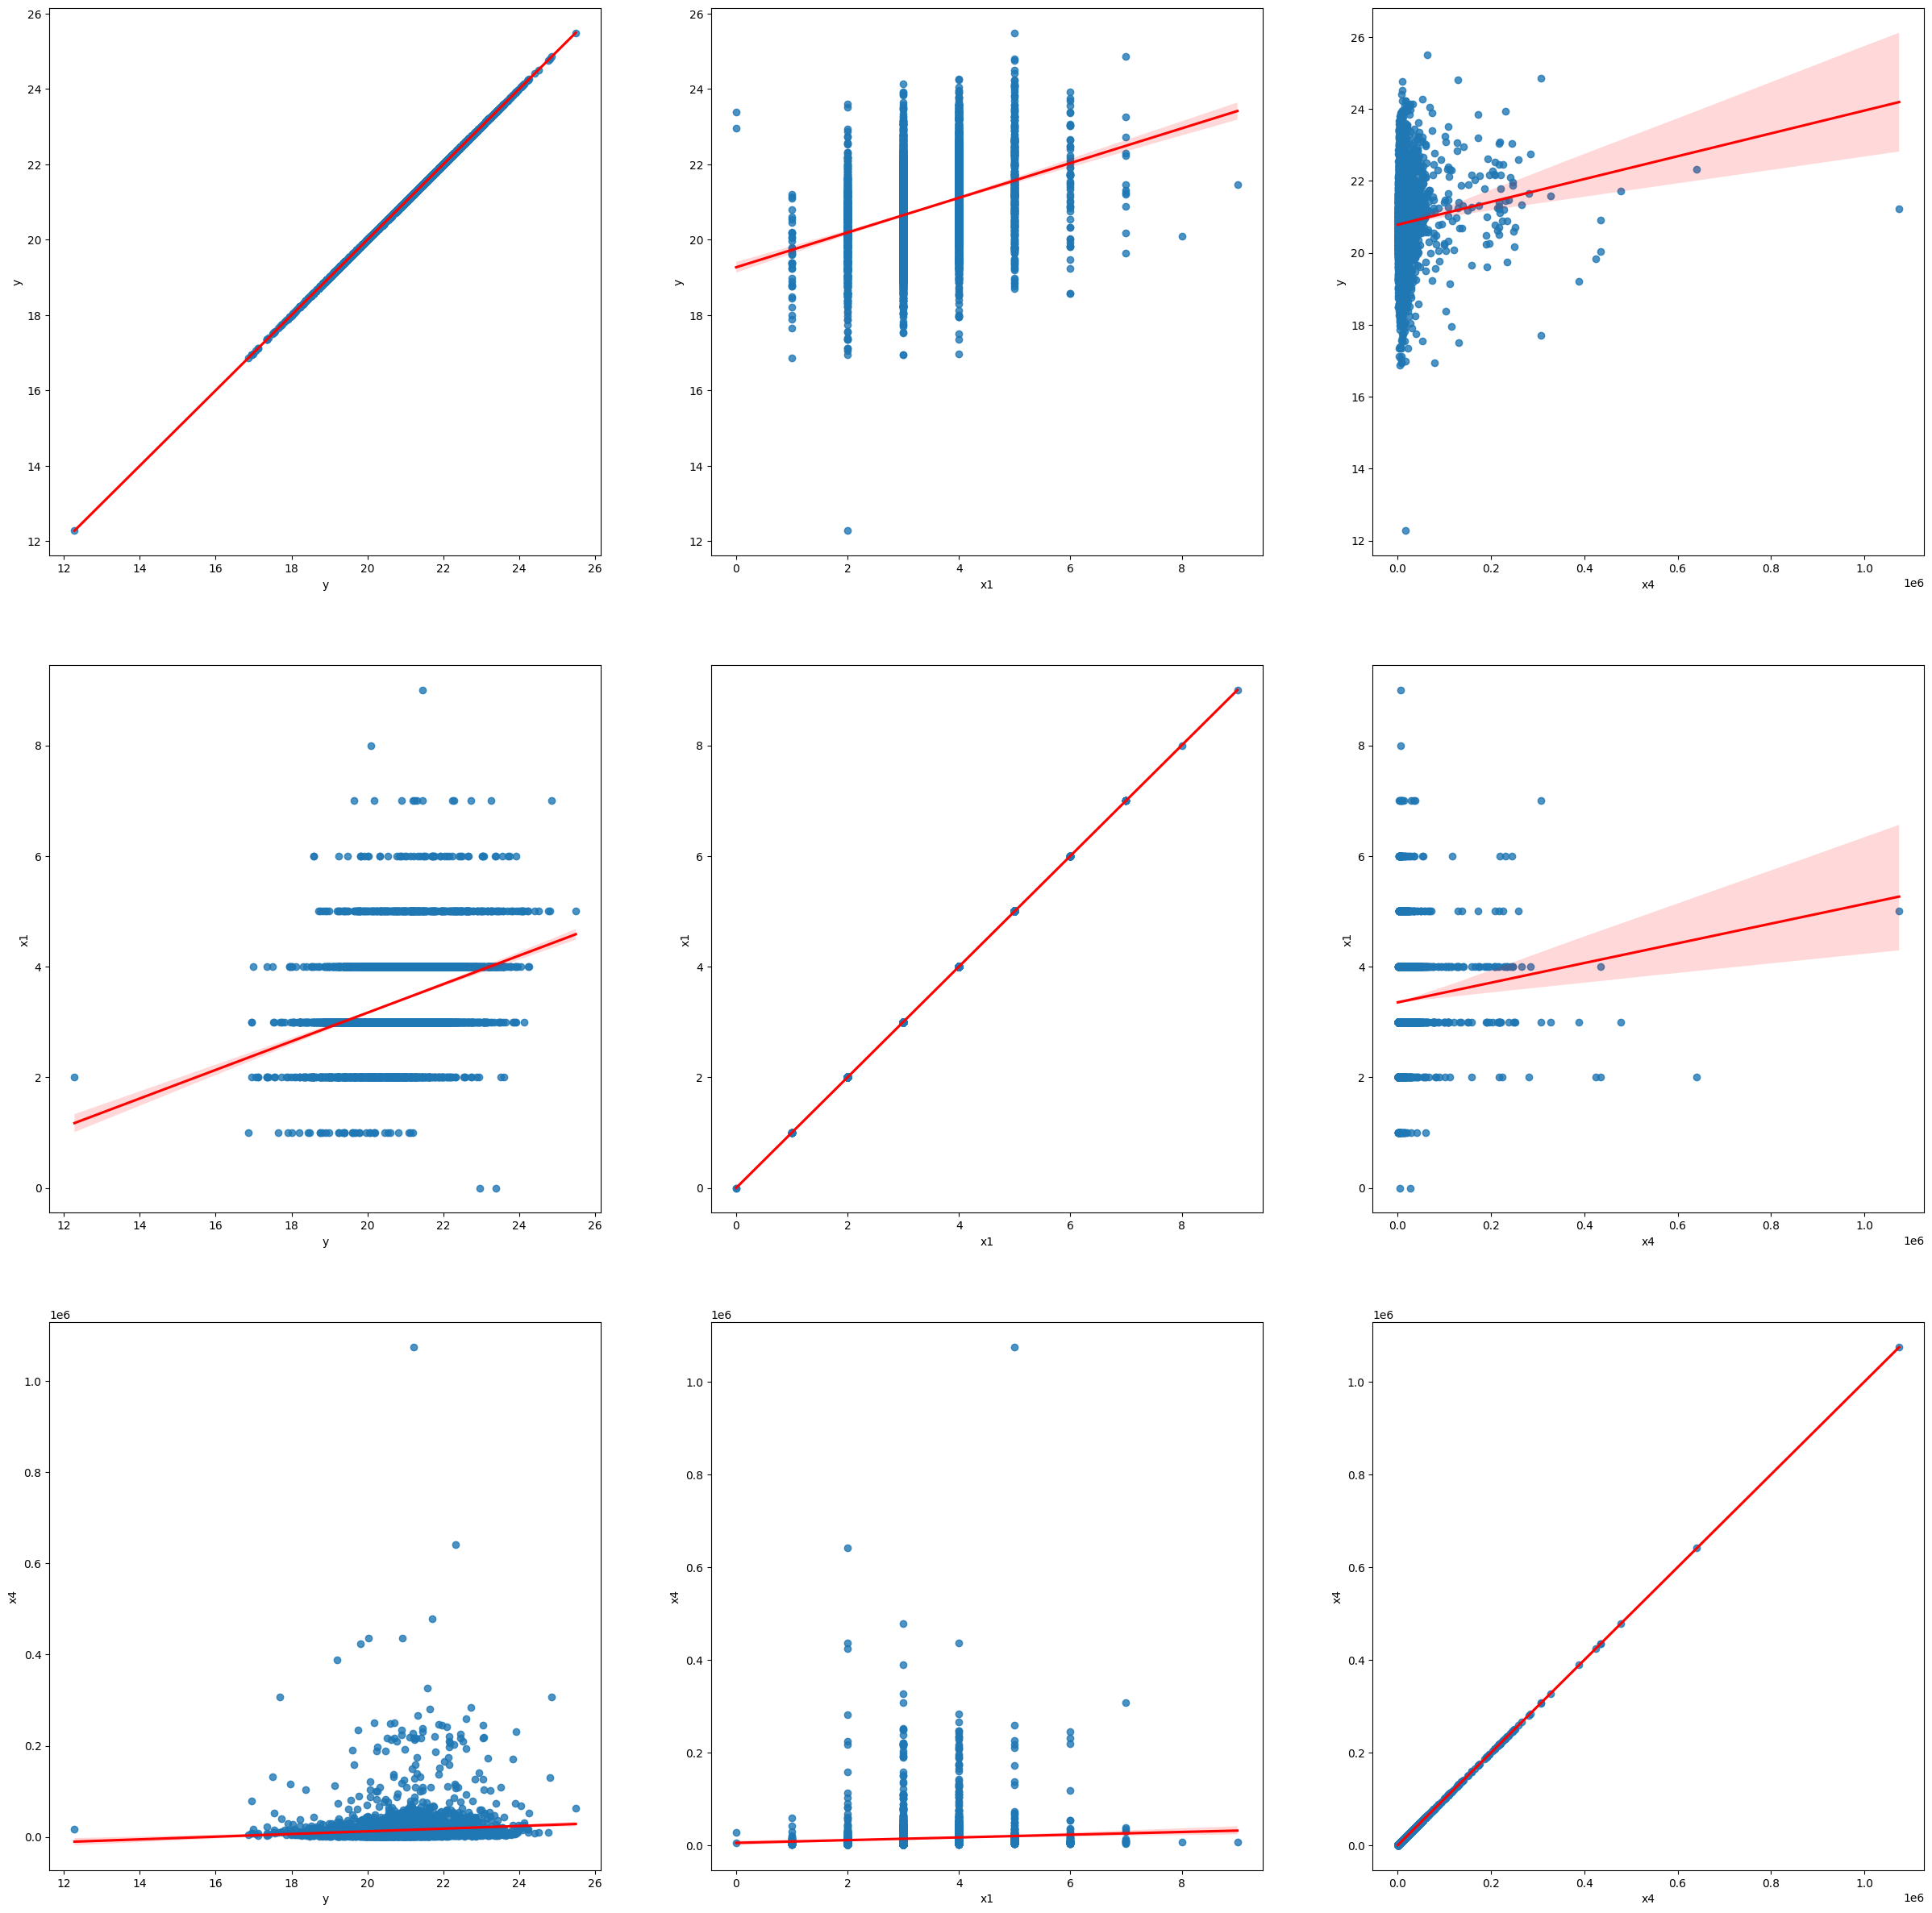

In [51]:
plt.figure(figsize=(30, 30))
for i1 in range(len(df.columns)):
    var1 = df.columns[i1]
    for i2 in range(len(df.columns)):
        var2 = df.columns[i2]

        plt.subplot(len(df.columns), len(df.columns), 1 + i1 + i2 * len(df.columns))
        sns.regplot(df, x=var1, y=var2, line_kws={'color': 'red'})

In [52]:
model.conf_int()

0          1
const  19.127952  19.384730
x1      0.417158   0.490768
x4      0.000001   0.000003

In [53]:
influence = model.get_influence()
summary = influence.summary_frame()
summary = summary[summary['cooks_d'] > 4/len(df)]
outliers = summary[summary['standard_resid'] > 3]
outliers

dfb_const    dfb_x1    dfb_x4   cooks_d  standard_resid  hat_diag  \
2328  -0.078861  0.088109  0.062917  0.005059        3.415595  0.001299   
2365   0.193761 -0.186918 -0.000247  0.012501        3.302009  0.003428   
2495   0.029910 -0.021232  0.023427  0.001020        3.081033  0.000322   
3209   0.212281 -0.208502  0.034826  0.015574        3.637402  0.003519   
3875   0.080082 -0.070389 -0.001783  0.002363        3.056547  0.000758   

      dffits_internal  student_resid    dffits  
2328         0.123192       3.419688  0.123340  
2365         0.193655       3.305683  0.193871  
2495         0.055308       3.083972  0.055361  
3209         0.216151       3.642401  0.216448  
3875         0.084191       3.059411  0.084270

In [54]:
outliers = df.loc[outliers.index]
df = df.drop(outliers.index)

In [55]:
X = df.drop(columns=['y'], axis=1)
y = df['y']
X = sm.add_constant(X)

In [56]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     326.4
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          5.16e-133
Time:                        10:20:04   Log-Likelihood:                -6794.3
No. Observations:                4457   AIC:                         1.359e+04
Df Residuals:                    4454   BIC:                         1.361e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2276      0.065    294.057      0.000      19.099      19.356
x1             0.4615      0.019     24.625      0.000       0.425       0.498
x4          2.311e-06    4.6e-07      5.022      0.000    1.41e-06    3.21e-06
==============================================================================
Omnibus:                       33.471   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.466
Skew:                          -0.122   Prob(JB):                     6.01e-10
Kurtosis:                       3.412   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

По итогу модель сильно ухудшилась при удалении выбросов